In [1]:
# Compara la serie de tiempo del onset
# y withdrawal para CPC y CHIRPS

import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import ticker

# Permite ajustar los valores de todas las gráficas
#params = {"ytick.color" : "w",
#          "xtick.color" : "w",
#          "axes.labelcolor" : "w",
#          "axes.edgecolor" : "w",
#          "text.color": "w"}
#plt.rcParams.update(params)

In [2]:
# Rutas de archivos.
path_d = "../results/onset/"
path_r = "../results/onset/graficas/"

# Si no existe la carpeta, la crea.
if not os.path.exists(path_r):
    os.mkdir(path_r)

# Serie de tiempo de CPC.
CPC = pd.read_csv(path_d + "onset_CPC.csv", index_col = "Año")

# Se convierten las fechas a días julianos.
CPC["Cuenca - Onset"] = CPC["Cuenca - Onset"].apply(
    lambda x: pd.to_datetime(x))
CPC["Cuenca - Onset"] = CPC["Cuenca - Onset"].apply(
    lambda x: x.dayofyear)
CPC["Cuenca - Withdrawal"] = CPC["Cuenca - Withdrawal"].apply(
    lambda x: pd.to_datetime(x))
CPC["Cuenca - Withdrawal"] = CPC["Cuenca - Withdrawal"].apply(
    lambda x: x.dayofyear)

# Serie de tiempo de CHIRPS.
CHIRPS = pd.read_csv(path_d + "onset_CHIRPS.csv", index_col = "Año")

# Se convierten las fechas a días julianos.
CHIRPS["Cuenca - Onset"] = CHIRPS["Cuenca - Onset"].apply(
    lambda x: pd.to_datetime(x))
CHIRPS["Cuenca - Onset"] = CHIRPS["Cuenca - Onset"].apply(
    lambda x: x.dayofyear)
CHIRPS["Cuenca - Withdrawal"] = CHIRPS["Cuenca - Withdrawal"].apply(
    lambda x: pd.to_datetime(x))
CHIRPS["Cuenca - Withdrawal"] = CHIRPS["Cuenca - Withdrawal"].apply(
    lambda x: x.dayofyear)

# Media móvil.
l = 20
CHIRPS["Onset - Mean"] = CHIRPS["Cuenca - Onset"
    ].rolling(window = l).mean()
CHIRPS["Withdrawal - Mean"] = CHIRPS["Cuenca - Withdrawal"
    ].rolling(window = l).mean()
CPC["Onset - Mean"] = CPC["Cuenca - Onset"
    ].rolling(window = l).mean()
CPC["Withdrawal - Mean"] = CPC["Cuenca - Withdrawal"
    ].rolling(window = l).mean()

Onset correlation: 0.875


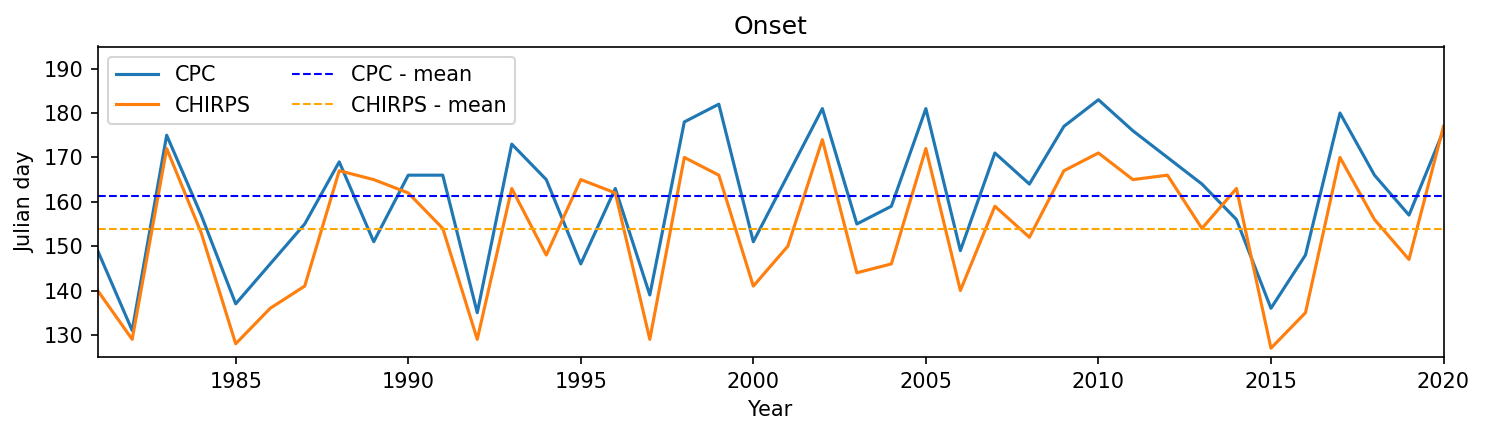

In [14]:
# Graficamos.
fig, ax = plt.subplots()
fig.set_facecolor("w")
#fig.set_size_inches(10, 12)
fig.set_size_inches(10, 3)
fig.set_dpi(150)

CPC["Cuenca - Onset"].plot(ax = ax)
CHIRPS["Cuenca - Onset"].plot(ax = ax)

ax.plot( (1981, 2020), (CPC["Cuenca - Onset"].mean(),)*2,
    color = "blue", linestyle = "dashed", linewidth = 1 )
ax.plot( (1981, 2020), (CHIRPS["Cuenca - Onset"].mean(),)*2,
    color = "orange", linestyle = "dashed", linewidth = 1 )


# Formato de ejes.
ax.set_ylabel("Julian day")
ax.legend( ["CPC", "CHIRPS", "CPC - mean", "CHIRPS - mean"], ncol = 2 )
ax.set_xlabel("")
ax.set_xlim(1981, 2020)
ax.set_ylim(125, 195)
ax.set_xlabel("Year")

ax.set_title("Onset")

# Correlaciones de las series.
corr = []
corr.append( CPC["Cuenca - Onset"].corr( CHIRPS["Cuenca - Onset"] ) )
print(f"Onset correlation: {corr[0]:.3f}")

# Separación adecuada entre gráficas.
fig.tight_layout()

# Guardamos el archivo.
fig.savefig(path_r + "comparacion.png")